<br><br><br><br><br>

# uproot: array-based ROOT I/O

<br><br><br><br><br>

In [1]:
# Uproot presents files and subdirectories with the same interface as Python dicts.

import uproot
file = uproot.open("http://scikit-hep.org/uproot/examples/nesteddirs.root")
file.keys()

# Exercise: how many objects named "tree" does this file contain?
# 
# (https://uproot.readthedocs.io/en/latest/root-io.html#uproot-rootio-rootdirectory)

[b'one;1', b'three;1']

In [2]:
# TTrees are also presented like Python dicts.

events = uproot.open("data/Zmumu.root")["events"]
events.keys()

[b'Type',
 b'Run',
 b'Event',
 b'E1',
 b'px1',
 b'py1',
 b'pz1',
 b'pt1',
 b'eta1',
 b'phi1',
 b'Q1',
 b'E2',
 b'px2',
 b'py2',
 b'pz2',
 b'pt2',
 b'eta2',
 b'phi2',
 b'Q2',
 b'M']

In [4]:
# And there are functions like array (singular) and arrays (plural) to get one or more arrays.

print(events.array("E1"), end="\n\n\n\n")

print(events.arrays(["E1", "px1", "py1", "pz1"]))

[82.20186639 62.34492895 62.34492895 ... 81.27013558 81.27013558
 81.56621735]



{b'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
       81.27013558, 81.56621735]), b'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
        32.37749196,  32.48539387]), b'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
         1.19940578,   1.2013503 ]), b'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
       -74.53243061, -74.80837247])}


In [5]:
# Some tricks for arrays (plural): (1) specify an encoding to get strings, rather than raw bytes.
# 
# Note: Python 3 bytestrings start with `b`, strings do not.

events.arrays(["E1", "px1", "py1", "pz1"], namedecode="utf-8")

{'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247])}

In [6]:
# Some tricks for arrays (plural): (2) specify an output type to wrap them in a different container:

events.arrays(["E1", "px1", "py1", "pz1"], outputtype=tuple)

(array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247]))

In [7]:
# Some tricks for arrays (plural): (2) specify an output type to wrap them in a different container:
# (see also tree.pandas.df)

import pandas
events.arrays(["E1", "px1", "py1", "pz1"], outputtype=pandas.DataFrame)

,E1,px1,py1,pz1
entry,,,,
0,82.201866,-41.195288,17.433244,-68.964962
1,62.344929,35.118050,-16.570362,-48.775247
2,62.344929,35.118050,-16.570362,-48.775247
3,60.621875,34.144437,-16.119525,-47.426984
4,41.826389,22.783582,15.036444,-31.689894
5,48.981407,-19.862307,-9.204225,43.817098
6,48.981407,-19.862307,-9.204225,43.817098
7,49.760726,-20.177373,-9.354149,44.513955
8,132.780755,71.143711,29.542308,-108.150553


In [8]:
# Some tricks for arrays (plural): (3a) use filename wildcards (*, ?, [...]) to select by name-pattern.

events.arrays(["E*", "p[xyz]1"])

{b'Event': array([10507008, 10507008, 10507008, ..., 99991333, 99991333, 99991333],
       dtype=int32),
 b'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 b'E2': array([ 60.62187459,  82.20186639,  81.58277833, ..., 168.78012134,
        170.58313243, 170.58313243]),
 b'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 b'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 b'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247])}

In [9]:
# Some tricks for arrays (plural): (3b) use slashes inside the quotes to use full regular expressions.

events.arrays(["/E.*/", "/p[x-z]1/"])

{b'Event': array([10507008, 10507008, 10507008, ..., 99991333, 99991333, 99991333],
       dtype=int32),
 b'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 b'E2': array([ 60.62187459,  82.20186639,  81.58277833, ..., 168.78012134,
        170.58313243, 170.58313243]),
 b'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 b'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 b'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247])}

<br>

<p style="font-weight: bold; font-size: 1.875em; color: gray">Three ways to get data:</p>

<table width="100%" style="font-size: 1.25em"><tr>
    <td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Direct</p>
        <p>Read the file and return an array.</p>
        <ul>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#id11">TBranch.array</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#array">TTree.array</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#arrays">TTree.arrays</a></li>
        </ul>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Lazy</p>
        <p>Get an object that reads on demand.</p>
        <ul>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#id13">TBranch.lazyarray</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#lazyarray">TTree.lazyarray</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#lazyarrays">TTree.lazyarrays</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/opening-files.html#uproot-lazyarray-and-lazyarrays">uproot.lazyarray</a>*</li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/opening-files.html#uproot-lazyarray-and-lazyarrays">uproot.lazyarrays</a>*</li>
        </ul>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Iterative</p>
        <p>Read arrays in batches of entries.</p>
        <ul>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#iterate">TTree.iterate</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/opening-files.html#uproot-iterate">uproot.iterate</a>*</li>
        </ul>
    </td>
</tr></table>

<p>*Lazy arrays or iteration over sets of files.</p>

In [10]:
# Direct:

events.array("E1")

array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
       81.27013558, 81.56621735])

In [11]:
# Lazy:

array = events.lazyarray("E1", entrysteps=500)
# print([len(x) for x in array.chunks])

array

<ChunkedArray [82.2018663875 62.3449289481 62.3449289481 ... 81.2701355756 81.2701355756 81.5662173543] at 0x7f14d33a8828>

In [12]:
# Iterative:

for chunk in events.iterate("E1", entrysteps=500):
    print(len(chunk[b"E1"]), chunk[b"E1"][:5])

500 [82.20186639 62.34492895 62.34492895 60.62187459 41.82638891]
500 [45.7959062  45.7108209  98.03548137 53.53706097 53.53706097]
500 [31.4488924  31.4488924  31.39073377 64.85457285 46.92904281]
500 [88.35872379 52.5560163  52.5560163  52.38402383 75.34015706]
304 [46.0752809  46.0752809  45.93225789 51.01950403 84.91115834]


<br><br>

<p style="font-weight: bold; font-size: 1.875em; color: gray">Advantages and disadvantages of each:</p>

<table width="100%" style="font-size: 1.25em"><tr>
    <td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Direct</p>
        <p>Simple; returns pure Numpy arrays if possible.</p>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Lazy</p>
        <p>Transparently work on data too large to fit into memory.</p>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Iterative</p>
        <p>Control the loading of data into and out of memory.</p>
    </td>
</tr></table>

In [13]:
# Exercise: compute numpy.sqrt(E1**2 - px1**2 - py1**2 - pz1**2) in all three modes.
# 
# (https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

import numpy

arrays = events.arrays(["E1", "p[xyz]1"], namedecode="utf-8")
E1, px1, py1, pz1 = arrays["E1"], arrays["px1"], arrays["py1"], arrays["pz1"]

# This is direct. What about lazy and iterative?
result = numpy.sqrt(E1**2 - px1**2 - py1**2 - pz1**2)
result

array([0.10565837, 0.10565839, 0.10565839, ..., 0.10565838, 0.10565838,
       0.10565833])

In [14]:
# Controlling the chunk size:

print("Lazy or iteration steps as a fixed number of entries:")
for arrays in events.iterate(entrysteps=500):
    print(len(arrays[b"E1"]))

print("\nLazy or iteration steps as a fixed memory footprint:")
for arrays in events.iterate(entrysteps="100 kB"):
    print(len(arrays[b"E1"]))

Lazy or iteration steps as a fixed number of entries:
500
500
500
500
304

Lazy or iteration steps as a fixed memory footprint:
717
717
717
153


<br><br><br><br><br>

## Application: feeding data into PyTorch

<br><br><br><br><br>

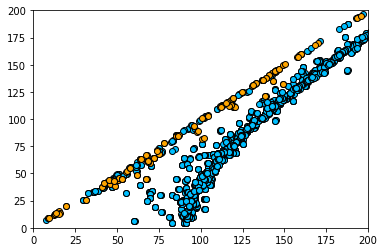

In [15]:
# Let's train a neural network! First, though, we need to set up a problem.

# 2-dimensional for simplicity (easier to visualize and we don't have much data).
E1, E2, px1, py1, pz1, px2, py2, pz2, Q1, Q2 = \
                                events.arrays(["E[12]", "p[xyz][12]", "Q[12]"], outputtype=tuple)
E = (E1 + E2)
p = numpy.sqrt((px1 + px2)**2 + (py1 + py2)**2 + (pz1 + pz2)**2)

# Need to predict opposite sign (deepskyblue) vs same sign (orange) using E and p.
%matplotlib inline
import matplotlib.pyplot
matplotlib.pyplot.scatter(E[Q1 != Q2], p[Q1 != Q2], c="deepskyblue", edgecolor="black");
matplotlib.pyplot.scatter(E[Q1 == Q2], p[Q1 == Q2], c="orange", edgecolor="black");
matplotlib.pyplot.xlim(0, 200);
matplotlib.pyplot.ylim(0, 200);

In [16]:
import torch                             # transform inputs to fit PyTorch's expected shape and type
X = torch.from_numpy(numpy.dstack([E, p])[0].astype(numpy.float32))
y = torch.from_numpy((Q1 != Q2).astype(numpy.float32).reshape(-1, 1))

neural_network = torch.nn.Sequential(    # the neural network topology:
    torch.nn.Linear(2, 5),               # input → hidden: 2 dimensions → 5 dimensions
    torch.nn.Sigmoid(),                  # non-linearity applied to each of the 5 components
    torch.nn.Linear(5, 1))               # hidden → output: 5 dimensions → 1 dimension

loss_fn = torch.nn.MSELoss(reduction="sum")
optimizer = torch.optim.Adam(neural_network.parameters(), lr=0.001)

for i in range(1000):                    # iterate 1000 times to minimize loss: y_pred - y
    y_pred = neural_network(X)           # neural_network is a function: X ↦ y
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

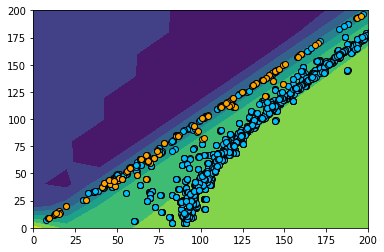

In [17]:
grid_of_points = numpy.dstack(numpy.mgrid[0:220:20, 0:220:20].astype(numpy.float32))
Z = neural_network(torch.from_numpy(grid_of_points)).detach().numpy().reshape(grid_of_points.shape[:2])
matplotlib.pyplot.contourf(grid_of_points[:, :, 0], grid_of_points[:, :, 1], Z);
matplotlib.pyplot.scatter(E[Q1 != Q2], p[Q1 != Q2], c="deepskyblue", edgecolor="black");
matplotlib.pyplot.scatter(E[Q1 == Q2], p[Q1 == Q2], c="orange", edgecolor="black");
matplotlib.pyplot.xlim(0, 200);
matplotlib.pyplot.ylim(0, 200);

In [18]:
# Now let's pretend the sample is so large, we can't load it into memory.
# What has changed? What's the same?

optimizer = torch.optim.Adam(neural_network.parameters(), lr=0.0001)  # learn slower: fewer data points...

for E1, E2, px1, py1, pz1, px2, py2, pz2, Q1, Q2 in \
        events.iterate(["E[12]", "p[xyz][12]", "Q[12]"], outputtype=tuple, entrysteps=500):
    E = (E1 + E2)
    p = numpy.sqrt((px1 + px2)**2 + (py1 + py2)**2 + (pz1 + pz2)**2)
    
    X = torch.from_numpy(numpy.dstack([E, p])[0].astype(numpy.float32))
    y = torch.from_numpy((Q1 != Q2).astype(numpy.float32).reshape(-1, 1))

    for i in range(1000):
        y_pred = neural_network(X)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [19]:
# Now do it from a sample of jagged arrays (variable number of values per event).

events2 = uproot.open("data/HZZ.root")["events"]
E_all, px_all, py_all, pz_all, q_all = \
                         events2.arrays(["Muon_E", "Muon_P[xyz]", "Muon_Charge"], outputtype=tuple)

E_all, px_all, py_all, pz_all, q_all

(<JaggedArray [[54.7795 39.401695] [31.690445] [54.739788 47.488857] ... [62.39516] [174.20863] [69.55621]] at 0x7f14719c96d8>,
 <JaggedArray [[-52.899456 37.73778] [-0.81645936] [48.98783 0.8275667] ... [-29.756786] [1.1418698] [23.913206]] at 0x7f14719c9eb8>,
 <JaggedArray [[-11.654672 0.6934736] [-24.404259] [-21.723139 29.800508] ... [-15.303859] [63.60957] [-35.665077]] at 0x7f14719c9860>,
 <JaggedArray [[-8.160793 -11.307582] [20.199968] [11.168285 36.96519] ... [-52.66375] [162.17632] [54.719437]] at 0x7f14719363c8>,
 <JaggedArray [[1 -1] [1] [1 -1] ... [-1] [-1] [-1]] at 0x7f14719364a8>)

In [20]:
# Getting two muons from events that have them:

print(E_all.counts)

E_all[E_all.counts >= 2, 0], E_all[E_all.counts >= 2, 1]

[2 1 2 ... 1 1 1]


(array([ 54.7795  ,  54.739788, 413.46002 , ...,  60.03222 ,  66.367775,
        157.22563 ], dtype=float32),
 array([ 39.401695,  47.488857, 344.04153 , ...,  40.399345,  28.650345,
        116.12509 ], dtype=float32))

In [21]:
# Or all pairs, without double-counting:

left, right = E_all.argchoose(2).i0, E_all.argchoose(2).i1

E_all[left].flatten(), E_all[right].flatten()

(array([ 54.7795  ,  54.739788, 413.46002 , ...,  60.03222 ,  66.367775,
        157.22563 ], dtype=float32),
 array([ 39.401695,  47.488857, 344.04153 , ...,  40.399345,  28.650345,
        116.12509 ], dtype=float32))

In [22]:
# Exercise: set up and run the neural network with muons from the jagged sample.

X = FIXME
y = FIXME

neural_network = torch.nn.Sequential(torch.nn.Linear(2, 5), torch.nn.Sigmoid(), torch.nn.Linear(5, 1))
loss_fn = torch.nn.MSELoss(reduction="sum")
optimizer = torch.optim.Adam(neural_network.parameters(), lr=0.001)
for i in range(1000):
    y_pred = neural_network(X)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [23]:
grid_of_points = numpy.dstack(numpy.mgrid[0:520:20, 0:520:20].astype(numpy.float32))
Z = neural_network(torch.from_numpy(grid_of_points)).detach().numpy().reshape(grid_of_points.shape[:2])
matplotlib.pyplot.contourf(grid_of_points[:, :, 0], grid_of_points[:, :, 1], Z);
matplotlib.pyplot.scatter(E[Q1 != Q2], p[Q1 != Q2], c="deepskyblue", edgecolor="black");
matplotlib.pyplot.scatter(E[Q1 == Q2], p[Q1 == Q2], c="orange", edgecolor="black");
matplotlib.pyplot.xlim(0, 500);
matplotlib.pyplot.ylim(0, 500);

<br><br><br><br><br>

## Caching

<br><br><br><br><br>

In [24]:
# Direct array-reading is simple: every time you ask for an array, it reads from the file (raw bytes may be cached).
# 
# You could avoid duplicate reading/decompressing/formatting by keeping a reference to previously read arrays.

# read
arrays = events.arrays(["E1", "p[xyz]1"], namedecode="utf-8")

# use
numpy.sqrt(arrays["px1"]**2 + arrays["py1"]**2)

# use again
numpy.sqrt(arrays["E1"]**2 - arrays["px1"]**2 - arrays["py1"]**2 - arrays["pz1"]**2)

array([0.10565837, 0.10565839, 0.10565839, ..., 0.10565838, 0.10565838,
       0.10565833])

In [25]:
# But that would force you to re-arrange your analysis script to satisfy hardware constraints.
# 
# Instead, use uproot's caching mechanism: any dict-like object can be used as a cache.

mycache = {}

# read and use
E1, px1, py1, pz1 = events.arrays(["E1", "p[xyz]1"], outputtype=tuple, cache=mycache)
numpy.sqrt(px1**2 + py1**2)

# get from cache and use again
E1, px1, py1, pz1 = events.arrays(["E1", "p[xyz]1"], outputtype=tuple, cache=mycache)
numpy.sqrt(E1**2 - px1**2 - py1**2 - pz1**2)

array([0.10565837, 0.10565839, 0.10565839, ..., 0.10565838, 0.10565838,
       0.10565833])

In [26]:
# The data are now in the mycache dict, which you can clear whenever you need to.

# mycache.clear()
mycache

{'AAGUS3fQmKsR56dpAQAAf77v;events;E1;asdtype(Bf8(),Lf8());0-2304': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 'AAGUS3fQmKsR56dpAQAAf77v;events;px1;asdtype(Bf8(),Lf8());0-2304': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 'AAGUS3fQmKsR56dpAQAAf77v;events;py1;asdtype(Bf8(),Lf8());0-2304': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 'AAGUS3fQmKsR56dpAQAAf77v;events;pz1;asdtype(Bf8(),Lf8());0-2304': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247])}

<br><br>

<p style="font-size: 1.25em">The point is that naive, exploratory code can become production-ready code <i>in small steps</i>.</p>

<p style="font-size: 1.25em; font-weight: bold; color: gray">Development sequence:</p>

   1. Read directly from the file in early exploration because it requires the least effort.
   2. Insert `mycache = {}` and `cache=mycache` to avoid costly re-reading when you start looking at more data.
   3. Use an `uproot.ArrayCache` to specify an upper limit when you start running out of memory.
   4. Maybe use an external cache like [memcached](https://realpython.com/python-memcache-efficient-caching/) to quickly recover from crashing 90% through your script, to more easily debug that last 10%.
   5. Maybe use a [diskcache](http://www.grantjenks.com/docs/diskcache/tutorial.html) to split data between a small, fast disk and a large, slow disk...

Most cache libraries in the Python ecosystem use this dict of string → objects interface.

<br><br>

In [27]:
# Example of limited memory:

mycache = uproot.ArrayCache("100 kB")     # integer number of bytes or string with units

events.arrays(cache=mycache)

# arrays in cache    arrays in file
len(mycache),        len(events.keys())

(6, 20)

In [28]:
# With large lazy arrays, you SHOULD use a cache with an upper limit.
# (Otherwise, they'll hang onto data forever.)

data = uproot.lazyarray(
    # a bunch or files
    "data/sample-*-zlib.root",
    # TTree name in each file
    "sample",
    # branch(s) in each file for lazyarray(s)
    "Af8",
    # use this cache with an upper limit instead of reading exactly once
    cache=uproot.ArrayCache("5 kB"))

data

<ChunkedArray [[] [-15.0] [-15.0 -13.9] ... [10.0 11.1] [10.0 11.1 12.2] [10.0 11.1 12.2 13.3]] at 0x7f14718e8390>

In [29]:
# Compute something to do a pass over all chunks...
# data + 100

[chunk.ismaterialized for chunk in data.chunks]

[True, False, False, False, False, False, False, False, False, False, True]

In [30]:
# With iteration, you SHOULD NOT use a cache because the iteration manages memory explicitly.
# You wouldn't want to keep the previous iteration in memory when you're done with it, right?

for chunk in uproot.iterate("data/sample-*-zlib.root", "sample", "Af8", entrysteps="0.5 kB"):
    print(len(chunk[b"Af8"]), chunk[b"Af8"][:5])

20 [[] [-15.0] [-15.0 -13.9] [-15.0 -13.9 -12.8] [-15.0 -13.9 -12.8 -11.7]]
10 [[] [5.0] [5.0 6.1] [5.0 6.1 7.2] [5.0 6.1 7.2 8.3]]
20 [[] [-15.0] [-15.0 -13.9] [-15.0 -13.9 -12.8] [-15.0 -13.9 -12.8 -11.7]]
10 [[] [5.0] [5.0 6.1] [5.0 6.1 7.2] [5.0 6.1 7.2 8.3]]
20 [[] [-15.0] [-15.0 -13.9] [-15.0 -13.9 -12.8] [-15.0 -13.9 -12.8 -11.7]]
10 [[] [5.0] [5.0 6.1] [5.0 6.1 7.2] [5.0 6.1 7.2 8.3]]
20 [[] [-15.0] [-15.0 -13.9] [-15.0 -13.9 -12.8] [-15.0 -13.9 -12.8 -11.7]]
10 [[] [5.0] [5.0 6.1] [5.0 6.1 7.2] [5.0 6.1 7.2 8.3]]
20 [[] [-15.0] [-15.0 -13.9] [-15.0 -13.9 -12.8] [-15.0 -13.9 -12.8 -11.7]]
10 [[] [5.0] [5.0 6.1] [5.0 6.1 7.2] [5.0 6.1 7.2 8.3]]
20 [[] [-15.0] [-15.0 -13.9] [-15.0 -13.9 -12.8] [-15.0 -13.9 -12.8 -11.7]]
10 [[] [5.0] [5.0 6.1] [5.0 6.1 7.2] [5.0 6.1 7.2 8.3]]
20 [[] [-15.0] [-15.0 -13.9] [-15.0 -13.9 -12.8] [-15.0 -13.9 -12.8 -11.7]]
10 [[] [5.0] [5.0 6.1] [5.0 6.1 7.2] [5.0 6.1 7.2 8.3]]
20 [[] [-15.0] [-15.0 -13.9] [-15.0 -13.9 -12.8] [-15.0 -13.9 -12.8 -11.7]]


<br><br><br><br><br>

## Objects in arrays

<br><br><br><br><br>

In [31]:
# Most of the complexity of ROOT data is simplified by the fact that custom classes are "split" into branches.
# uproot sees the branches.

tree = uproot.open("http://scikit-hep.org/uproot/examples/Event.root")["T"]
tree.show()

# branch name              streamer type, if any      uproot's interpretation

event                      TStreamerInfo              None
TObject                    TStreamerInfo              None
fUniqueID                  TStreamerBasicType         asdtype('>u4')
fBits                      TStreamerBasicType         asdtype('>u4')

fType[20]                  TStreamerBasicType         asdtype("('i1', (20,))")
fEventName                 TStreamerBasicType         asstring(4)
fNtrack                    TStreamerBasicType         asdtype('>i4')
fNseg                      TStreamerBasicType         asdtype('>i4')
fNvertex                   TStreamerBasicType         asdtype('>u4')
fFlag                      TStreamerBasicType         asdtype('>u4')
fTemperature               TStreamerBasicType         asdtype('>f4', 'float64')
fMeasures[10]              TStreamerBasicType         asdtype("('>i4', (10,))")
fMatrix[4][4]              TStreamerBasicType         asdtype("('>f4', (4, 4))", "('<f8', (4, 4))")
fClosestDistance           TStreamerBasicPointer      None
fEv

In [32]:
# In this view, class attributes are _not_ special types and can be read as arrays of numbers.

tree.array("fTemperature", entrystop=20)

array([20.28261757, 20.47114182, 20.5931778 , 20.5848484 , 20.80287933,
       20.2972393 , 20.30301666, 20.87490845, 20.56552505, 20.67128181,
       20.74524879, 20.85200119, 20.26188469, 20.82903862, 20.02412415,
       20.97918129, 20.71551132, 20.60189629, 20.11310196, 20.53161049])

In [33]:
# Fixed-width matrices map onto multidimensional arrays,

tree.array("fMatrix[4][4]", entrystop=6)

array([[[ 1.54053164,  0.09474282,  1.52469206,  0.        ],
        [-0.13630907,  0.80078429,  1.70623565,  0.        ],
        [-1.16029346,  2.012362  ,  4.02206421,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[ 0.41865557,  1.60363352, -0.56923842,  0.        ],
        [ 0.06950195,  0.79105824,  2.0322361 ,  0.        ],
        [ 0.05688119,  2.52811217,  3.91394544,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[-1.24031985,  2.3477006 , -0.67482847,  0.        ],
        [ 1.22933233,  1.39499295,  2.17524433,  0.        ],
        [ 0.18559125,  2.40421987,  4.56326485,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[-0.43785933, -0.05061727,  0.28988785,  0.        ],
        [-0.90204114,  0.88527524,  2.34751844,  0.        ],
        [ 0.3241719 ,  0.79971647,  4.13229847,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],



In [34]:
# branches with multiple leaves ("leaf-list") map onto Numpy record arrays,

uproot.open("http://scikit-hep.org/uproot/examples/leaflist.root")["tree"].array("leaflist")

array([(1.1, 1,  97), (2.2, 2,  98), (3.3, 3,  99), (4. , 4, 100),
       (5.5, 5, 101)], dtype=[('x', '<f8'), ('y', '<i4'), ('z', 'i1')])

In [35]:
# and anything in variable-length lists become a JaggedArrays,

tree.array("fTracks.fMass2", entrystop=6)

<JaggedArray [[4.5 4.5 4.5 ... 4.5 4.5 4.5] [4.5 4.5 4.5 ... 4.5 4.5 4.5] [8.90625 8.90625 8.90625 ... 8.90625 8.90625 8.90625] [8.90625 8.90625 8.90625 ... 8.90625 8.90625 8.90625] [8.90625 8.90625 8.90625 ... 8.90625 8.90625 8.90625] [4.5 4.5 4.5 ... 4.5 4.5 4.5]] at 0x7f147193f128>

In [36]:
# even if they're fixed-width within jagged or whatever.

tree.array("fTracks.fTArray[3]", entrystop=6)

<JaggedArray [[[8.783523 17.513435 29.286354] [12.712547 18.882881 32.797363] [11.507339 19.916798 30.246092] ... [10.574707 18.890305 33.728233] [12.15555 18.71774 27.312075] [9.859776 19.74885 29.493528]] [[11.219862 21.20887 30.624903] [11.040182 24.79719 31.77871] [10.012672 20.93199 30.9403] ... [11.168169 23.217058 32.748943] [9.50235 21.121288 31.071629] [10.8550205 16.183943 26.904243]] [[8.624067 18.600851 26.04787] [10.689135 20.227545 29.83834] [11.296425 21.689695 27.481518] ... [10.669026 17.53861 27.396368] [10.695017 21.800402 29.768854] [9.190737 19.556316 30.239576]] [[10.730627 21.374237 29.189438] [10.917027 17.502947 24.684587] [10.719291 15.140461 30.947819] ... [11.342936 21.652617 30.104565] [10.155848 19.01908 31.161093] [9.246191 18.550188 29.727875]] [[11.012184 18.038168 25.433424] [9.5870495 19.802078 30.07635] [10.900804 19.059767 28.11974] ... [10.958439 19.644995 24.516222] [9.493415 19.871706 30.69776] [9.26706 21.658216 36.870094]] [[10.6818 23.174397 3

In [37]:
# There are some types that ROOT does not split because they are too complex.
# For example, *histograms* inside a TTree:

tree.array("fH", entrystop=6)

<ObjectArray [<b'TH1F' b'hstat' 0x7f1471a13868> <b'TH1F' b'hstat' 0x7f1471a139f8> <b'TH1F' b'hstat' 0x7f1471a13ea8> <b'TH1F' b'hstat' 0x7f1471a13868> <b'TH1F' b'hstat' 0x7f1471a139f8> <b'TH1F' b'hstat' 0x7f1471a13ea8>] at 0x7f14719da1d0>

In [38]:
# Uproot can read objects like this because ROOT describes their layout in "streamers."
# Uproot reads the (most common types of) streamers and generates Python classes.
# Some of these Python classes have specialized, high-level methods.

for histogram in tree.array("fH", entrystop=3):
    print(histogram.title)
    print(histogram.values)
print("\n...\n")
for histogram in tree.array("fH", entrystart=-3):
    print(histogram.title)
    print(histogram.values)

b'Event Histogram'
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
b'Event Histogram'
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
b'Event Histogram'
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]

...

b'Event Histogram'


In [39]:
# One type, TLorentzVector, has MANY high-level methods.

events3 = uproot.open("data/HZZ-objects.root")["events"]
muons = events3.array("muonp4")
muons

<JaggedArrayMethods [[TLorentzVector(-52.899, -11.655, -8.1608, 54.779) TLorentzVector(37.738, 0.69347, -11.308, 39.402)] [TLorentzVector(-0.81646, -24.404, 20.2, 31.69)] [TLorentzVector(48.988, -21.723, 11.168, 54.74) TLorentzVector(0.82757, 29.801, 36.965, 47.489)] ... [TLorentzVector(-29.757, -15.304, -52.664, 62.395)] [TLorentzVector(1.1419, 63.61, 162.18, 174.21)] [TLorentzVector(23.913, -35.665, 54.719, 69.556)]] at 0x7f147178e1d0>

In [40]:
# A single TLorentzVector has the methods you'd expect (kinematics, delta_phi, delta_r),

muon1, muon2 = muons[0]

muon1, muon1.pt, muon1.delta_phi(muon2), (muon1 + muon2).mass

(TLorentzVector(-52.899, -11.655, -8.1608, 54.779),
 54.16810703140204,
 -2.9431136434497858,
 90.22779776988638)

In [41]:
# but they also apply vectorially (like Numpy functions):

muons1 = muons[muons.counts >= 2, 0]   # first muon in each event (that has two)
muons2 = muons[muons.counts >= 2, 1]   # second muon in each event (that has two)

muons1, muons1.pt, muons1.delta_phi(muons2), (muons1 + muons2).mass

(<ObjectArrayMethods [TLorentzVector(-52.899, -11.655, -8.1608, 54.779) TLorentzVector(48.988, -21.723, 11.168, 54.74) TLorentzVector(22.088, -85.835, 403.85, 413.46) ... TLorentzVector(53.006, -24.486, 13.952, 60.032) TLorentzVector(55.72, 26.37, -24.588, 66.368) TLorentzVector(34.507, 28.84, -150.66, 157.23)] at 0x7f147178e8d0>,
 array([54.16810703, 53.58826697, 88.6319431 , ..., 58.38824219,
        61.64505369, 44.97159626]),
 array([-2.94311364, -1.96041807, -1.13891626, ..., -3.00653589,
        -3.04918788, -2.76435781]),
 array([90.22779777, 74.74654928, 89.75736376, ..., 92.06495256,
        85.44384208, 75.96066262]))

In [42]:
# Doubly nested lists like std::vector<std::vector<T>> aren't handled transparently
# because they're stored differently.
# 
# Note: it's an ObjectArray, an array containing list objects.

doubly_nested = uproot.open(
                   "http://scikit-hep.org/uproot/examples/vectorVectorDouble.root")["t"]["x"].array()
doubly_nested

<ObjectArray [[] [[], []] [[10.0], [], [10.0, 20.0]] [[20.0, -21.0, -22.0]] [[200.0], [-201.0], [202.0]]] at 0x7f1471791ef0>

In [43]:
# The multidimensional slicing doesn't apply as it does for JaggedArrays.

try:
    doubly_nested[doubly_nested.counts > 0, 0]
except Exception as err:
    print(type(err), err)

<class 'AttributeError'> 'ObjectArray' object has no attribute 'counts'


In [44]:
# If you need to work with this type, explicitly convert it into a JaggedArray of JaggedArrays.

import awkward
jagged = awkward.fromiter(doubly_nested)
jagged

<JaggedArray [[] [[] []] [[10.0] [] [10.0 20.0]] [[20.0 -21.0 -22.0]] [[200.0] [-201.0] [202.0]]] at 0x7f147184c668>

In [45]:
# Now you can do all the things.

print(f"jagged[jagged.counts > 0, 0]: {jagged[jagged.counts > 0, 0]}")
print(f"jagged.flatten():             {jagged.flatten()}")
print(f"jagged.flatten().flatten():   {jagged.flatten().flatten()}")
print(f"jagged.sum():                 {jagged.sum()}")
print(f"jagged.sum().sum():           {jagged.sum().sum()}")

jagged[jagged.counts > 0, 0]: [[] [10.0] [20.0 -21.0 -22.0] [200.0]]
jagged.flatten():             [[] [] [10.0] ... [200.0] [-201.0] [202.0]]
jagged.flatten().flatten():   [  10.   10.   20.   20.  -21.  -22.  200. -201.  202.]
jagged.sum():                 [[] [0.0 0.0] [10.0 0.0 30.0] [-23.0] [200.0 -201.0 202.0]]
jagged.sum().sum():           [  0.   0.  40. -23. 201.]


<br><br><br><br><br>

## Reading and writing histograms

<br><br><br><br><br>

In [46]:
# As we've seen, histograms have some convenience methods.
# They're mostly for conversion to other formats, like Numpy.
# 
# Numpy "histograms" are a 2-tuple of counts and edges.

uproot.open("http://scikit-hep.org/uproot/examples/hepdata-example.root")["hpx"].numpy()

(array([2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 4.000e+00,
        6.000e+00, 1.200e+01, 8.000e+00, 9.000e+00, 1.500e+01, 1.500e+01,
        3.100e+01, 3.500e+01, 4.000e+01, 6.400e+01, 6.400e+01, 8.100e+01,
        1.080e+02, 1.240e+02, 1.560e+02, 1.650e+02, 2.090e+02, 2.620e+02,
        2.970e+02, 3.920e+02, 4.320e+02, 4.660e+02, 5.210e+02, 6.040e+02,
        6.570e+02, 7.880e+02, 9.030e+02, 1.079e+03, 1.135e+03, 1.160e+03,
        1.383e+03, 1.458e+03, 1.612e+03, 1.770e+03, 1.868e+03, 1.861e+03,
        1.946e+03, 2.114e+03, 2.175e+03, 2.207e+03, 2.273e+03, 2.276e+03,
        2.329e+03, 2.325e+03, 2.381e+03, 2.417e+03, 2.364e+03, 2.284e+03,
        2.188e+03, 2.164e+03, 2.130e+03, 1.940e+03, 1.859e+03, 1.763e+03,
        1.700e+03, 1.611e+03, 1.459e+03, 1.390e+03, 1.237e+03, 1.083e+03,
        1.046e+03, 8.880e+02, 7.520e+02, 7.420e+02, 6.730e+02, 5.550e+02,
        5.330e+02, 3.660e+02, 3.780e+02, 2.720e+02, 2.560e+02, 2.000e+02,
        1.740e+02, 1.320e+02, 1.180e+0

In [47]:
# Similarly for 2-dimensional histograms.

uproot.open("http://scikit-hep.org/uproot/examples/hepdata-example.root")["hpxpy"].numpy()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 [(array([-4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8, -2.6, -2.4, -2.2, -2. ,
          -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,
           0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,
           2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ]),
   array([-4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8, -2.6, -2.4, -2.2, -2. ,
          -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,
           0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,
           2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ]))])

In [48]:
# It can also be useful to turn histograms into Pandas DataFrames (note the IntervalIndex).

uproot.open("http://scikit-hep.org/uproot/examples/Event.root")["htime"].pandas()

,count,variance
Real-Time to write versus time,,
"[-inf, 0.0)",0.021839,0.000477
"[0.0, 1.0)",0.333522,0.111237
"[1.0, 2.0)",0.304030,0.092434
"[2.0, 3.0)",0.324519,0.105313
"[3.0, 4.0)",0.350973,0.123182
"[4.0, 5.0)",0.368942,0.136118
"[5.0, 6.0)",0.307283,0.094423
"[6.0, 7.0)",0.306812,0.094134
"[7.0, 8.0)",0.341563,0.116665


In [49]:
# Or HEPData's YAML format. As Python objects, it's just a little work to make different formats.

print(uproot.open("http://scikit-hep.org/uproot/examples/Event.root")["htime"].hepdata())

dependent_variables:
- header: {name: counts, units: null}
  qualifiers: []
  values:
  - errors:
    - {label: stat, symerror: 0.33352208137512207}
    value: 0.33352208137512207
  - errors:
    - {label: stat, symerror: 0.3040299415588379}
    value: 0.3040299415588379
  - errors:
    - {label: stat, symerror: 0.32451915740966797}
    value: 0.32451915740966797
  - errors:
    - {label: stat, symerror: 0.35097289085388184}
    value: 0.35097289085388184
  - errors:
    - {label: stat, symerror: 0.3689420223236084}
    value: 0.3689420223236084
  - errors:
    - {label: stat, symerror: 0.3072829246520996}
    value: 0.3072829246520996
  - errors:
    - {label: stat, symerror: 0.306812047958374}
    value: 0.306812047958374
  - errors:
    - {label: stat, symerror: 0.34156298637390137}
    value: 0.34156298637390137
  - errors:
    - {label: stat, symerror: 0.16150808334350586}
    value: 0.16150808334350586
  - errors:
    - {label: stat, symerror: 0.0}
    value: 0.0
independent_vari

In [50]:
# At the moment, only two kinds of objects can be *written* to ROOT files: TObjString and histograms.
# 
# To write, open a file for writing (create/recreate/update) and assign to it like a dict:

file = uproot.recreate("tmp.root", compression=uproot.ZLIB(4))
file["name"] = "Some object, like a TObjString."

In [51]:
import ROOT

pyroot_file = ROOT.TFile("tmp.root")
pyroot_file.Get("name")

Welcome to JupyROOT 6.17/01


'Some object, like a TObjString.'

In [52]:
# During assignment, uproot recognizes some Pythonic types, such as Numpy histograms.

file["from_numpy"] = numpy.histogram(numpy.random.normal(0, 1, 10000))

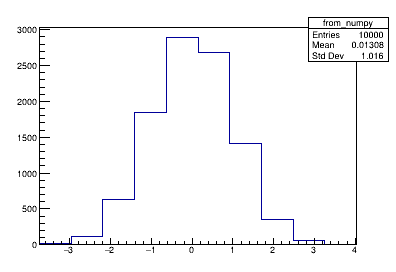

In [55]:
pyroot_file = ROOT.TFile("tmp.root")           # refresh the PyROOT file
pyroot_hist = pyroot_file.Get("from_numpy")

canvas = ROOT.TCanvas("canvas", "", 400, 300)
pyroot_hist.Draw("hist")
canvas.Draw()

In [56]:
# 2-dimensional Numpy histograms.

file["from_numpy2d"] = numpy.histogram2d(numpy.random.normal(0, 1, 10000), numpy.random.normal(0, 1, 10000))

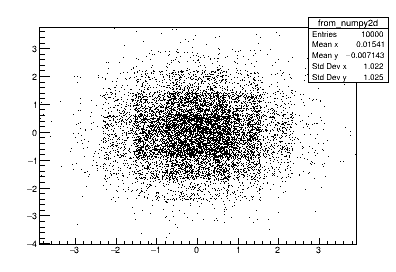

In [57]:
pyroot_file = ROOT.TFile("tmp.root")           # refresh the PyROOT file
pyroot_hist = pyroot_file.Get("from_numpy2d")

pyroot_hist.Draw()
canvas.Draw()

<br><br><br><br><br>

## Writing array data

<br><br><br><br><br>

In [58]:
# Obviously, it would be nice to write array data to ROOT files as new TTrees.
# This is an IRIS-HEP summer fellowship project (Pratyush Das).
# 
# Meanwhile, there are many nice options for saving and sharing Numpy arrays.

# Numpy's NPZ files (really just ZIP)
numpy.savez_compressed("one_array.npz", events.array("E1"))
numpy.savez_compressed("many_arrays.npz", **events.arrays(namedecode="utf-8"))

# HDF5
import h5py
with h5py.File("tmp.hdf5", "w") as file:
    file["E1"] = events.array("E1")

In [59]:
# If the arrays are jagged, lazy, or contain objects (i.e. not pure Numpy), use awkward-array.

# awkward's AWKD files (really just ZIP)
awkward.save("one_array.awkd", events2.array("Muon_Px"), mode="w")
awkward.save("many_arrays.awkd", events2.arrays("Muon_*", namedecode="utf-8"), mode="w")

# HDF5
with h5py.File("tmp.hdf5", "w") as file:
    awkward_file = awkward.hdf5(file)
    awkward_file["Muon_Px"] = events2.array("Muon_Px")

In [60]:
# There are also industry-standard formats for jagged arrays.

awkward.toparquet("one_array.parquet", events2.array("Muon_Px"))
awkward.toparquet("many_arrays.parquet", events2.lazyarrays())

In [61]:
# You can also do some crazy things like "saving the laziness" of lazy arrays to make lightweight skims:

# Read as lazy arrays with "persist virtual",
data = events.lazyarrays(["E*", "p[xyz]*"], persistvirtual=True)

# add a derived feature to the lazy array,
data["mass"] = numpy.sqrt((data["E1"] + data["E2"])**2 - (data["px1"] + data["px2"])**2 -
                          (data["py1"] + data["py2"])**2 - (data["pz1"] + data["pz2"])**2)

# and save it.
awkward.save("derived-feature.awkd", data, mode="w")

In [62]:
# When you read it back, the original features from from the ROOT files and the derived from the AWKD:

data2 = awkward.load("derived-feature.awkd")

# Reads from derived-feature.awkd
print(data2["mass"])

# Reads from the original ROOT files (if you don't move them!)
print(data2["E1"])

[82.46269155513643 83.62620400526137 83.30846466680981 ... 95.96547966432459 96.49594381502096 96.6567276548945]
[82.2018663875 62.3449289481 62.3449289481 ... 81.2701355756 81.2701355756 81.5662173543]


In [63]:
# Similarly, if you apply masks (cuts) to a lazy array, the cut is saved to AWKD but the original data are in ROOT:

selected = data[data["mass"] < 80]
print(selected)

awkward.save("selected-events.awkd", selected, mode="w")

print(awkward.load("selected-events.awkd"))

[<Row 16> <Row 17> <Row 18> <Row 19> <Row 47> <Row 48> <Row 49> ...]
[<Row 16> <Row 17> <Row 18> ... <Row 2297> <Row 2298> <Row 2299>]


<br><br><br><br><br>

<p style="font-size: 2em; text-align: center"><b>That's all!</b></p>

<br><br><br><br><br>